### Least-squares filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sclibrary import dataset_loader, SCPlot


sc, coordinates = dataset_loader.load_paper_data()
# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


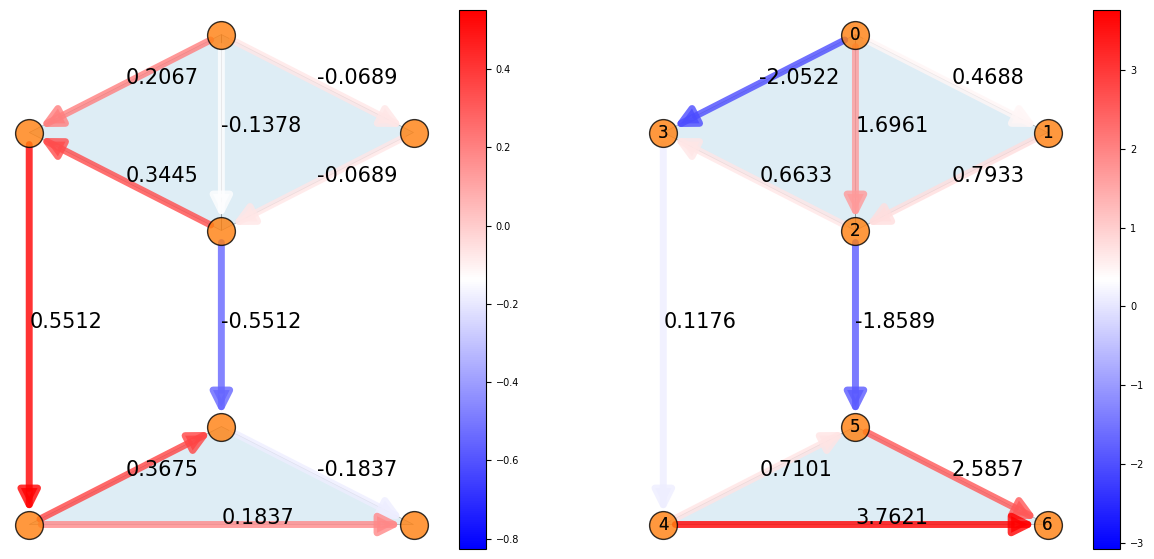

In [3]:
f0 = np.array([-0.0689, -0.1378, 0.2067, -0.0689, 0.3445, -0.5512, 0.5512, 0.3675, 0.1837, -0.1837])
f = np.array([0.4688, 1.6961, -2.0522, 0.7933, 0.6633, -1.8589, 0.1176, 0.7101, 3.7621, 2.5857])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

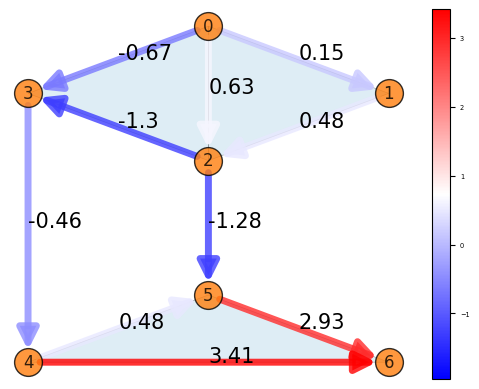

In [4]:
f_g = sc.get_hodgedecomposition(flow=f, component="gradient", round_fig=False)
scplot.draw_network(edge_flow=np.round(f_g, 2))

In [5]:
from sclibrary.filters import LSFilterDesign

lsfilter = LSFilterDesign(simplicial_complex=sc)

#### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 0.524945436142384
Filter size: 1 - Error: 0.4745316141475573
Filter size: 2 - Error: 0.48136896491928266
Filter size: 3 - Error: 0.504852741856508
Filter size: 4 - Error: 0.5367322722675506
Filter size: 5 - Error: 0.5013237194787095
Filter size: 6 - Error: 0.4344653357975742
Filter size: 7 - Error: 0.43489377762725856
Filter size: 8 - Error: 0.1329682052693668
Filter size: 9 - Error: 1.2181705921090865e-06
Filter size: 10 - Error: 1.0845906566665596e-06
Filter size: 11 - Error: 2.925372680897182e-07
Filter size: 12 - Error: 4.958076849493543e-07
Filter size: 13 - Error: 2.42828900153063e-07
Filter size: 14 - Error: 6.72680584976098e-07
Filter size: 15 - Error: 8.147079234026746e-06
Filter size: 16 - Error: 5.106576088322171e-05
Filter size: 17 - Error: 0.00024136798314082272
Filter size: 18 - Error: 0.002366291940541952
Filter size: 19 - Error: 0.0882785254029724
Filter size: 20 - Error: 0.0987005924683181
Filter size: 21 - Error: 0.09813428831870231
Filter size

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


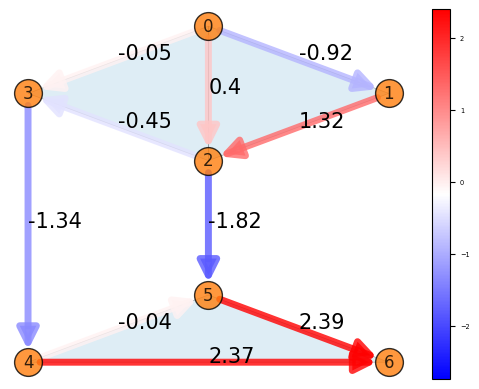

In [6]:
filter_size = 30

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f_g))

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

Filter size: 0 - Error: 0.524945436142384
Filter size: 1 - Error: 0.4745316141475573
Filter size: 2 - Error: 0.48136896491928266
Filter size: 3 - Error: 0.504852741856508
Filter size: 4 - Error: 0.5367322722675506
Filter size: 5 - Error: 0.5013237194787095
Filter size: 6 - Error: 0.4344653357975742
Filter size: 7 - Error: 0.43489377762725856
Filter size: 8 - Error: 0.1329682052693668
Filter size: 9 - Error: 1.2181705921090865e-06
Filter size: 10 - Error: 1.0845906566665596e-06
Filter size: 11 - Error: 2.925372680897182e-07
Filter size: 12 - Error: 4.958076849493543e-07
Filter size: 13 - Error: 2.42828900153063e-07
Filter size: 14 - Error: 6.72680584976098e-07
Filter size: 15 - Error: 8.147079234026746e-06
Filter size: 0 - Error: 0.9105007391498801
Filter size: 1 - Error: 0.9189324739856072
Filter size: 2 - Error: 0.9633681624628957
Filter size: 3 - Error: 0.9551408101374966
Filter size: 4 - Error: 0.9758580503794869
Filter size: 5 - Error: 0.9411818910684635
Filter size: 6 - Error: 0.8

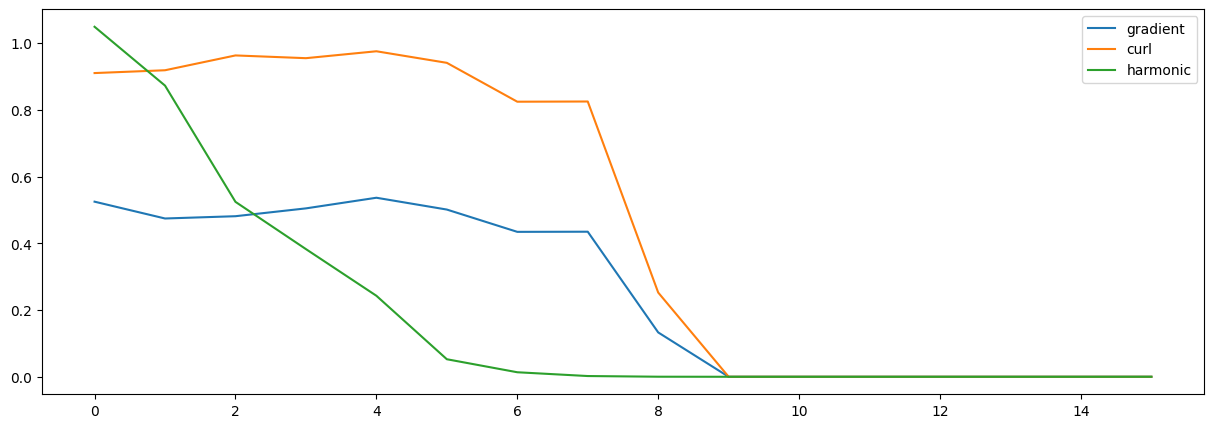

In [7]:
import matplotlib.pyplot as plt

filter_size = 16
plt.figure(figsize=(15, 5))

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="gradient")

# curl
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="curl", f=f,
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="curl")

# harmonic 
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="harmonic", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="harmonic")

plt.legend()

#### Subcomponent extraction type II - L1 != L2 and α != β

Filter size: 0 - Error: 0.5062219222281088
Filter size: 1 - Error: 0.3123287994810451
Filter size: 2 - Error: 0.17671921051374195
Filter size: 3 - Error: 0.10394164592496484
Filter size: 4 - Error: 0.04469373500911297
Filter size: 5 - Error: 0.003745293792531184
Filter size: 6 - Error: 2.1130119041494045e-12
Filter size: 7 - Error: 1.284876017704458e-11
Filter size: 8 - Error: 6.784692519224973e-11
Filter size: 9 - Error: 1.7066295407578088e-10
Filter size: 10 - Error: 1.4471041937838514e-09
Filter size: 11 - Error: 1.0589449074997874e-08
Filter size: 12 - Error: 2.8756430284395965e-08
Filter size: 13 - Error: 1.7404756859286776e-07
Filter size: 14 - Error: 1.2204928534264072e-06
Filter size: 15 - Error: 3.7329719146038994e-06
Filter size: 16 - Error: 3.131857963763414e-05
Filter size: 17 - Error: 0.0002698913910384113
Filter size: 18 - Error: 0.0013732227448482594
Filter size: 19 - Error: 0.0029595688104713234
Error: 0.0029595688104713234


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


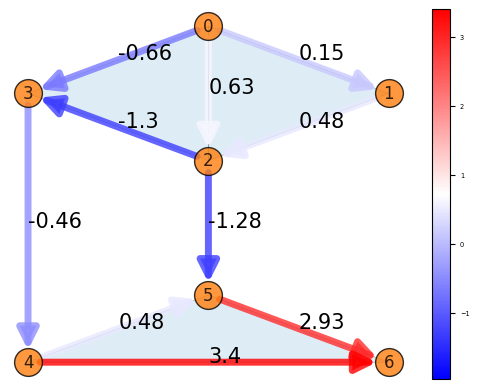

In [8]:
filter_range = 20

lsfilter.subcomponent_extraction_type_two(
    L=filter_range, component="gradient", f=f
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f_g))

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

#### General Filter

Filter size: 0 - Error: 0.5062219222281088
Filter size: 0 - Error: 1.4769300846529563
Error: 0.5062219222281088


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


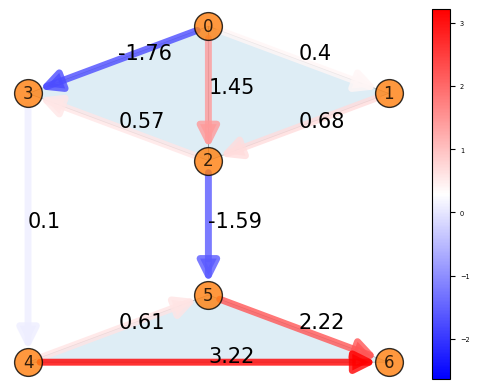

In [9]:
lsfilter = LSFilterDesign(simplicial_complex=sc)

f_est_h, f_est_c, f_est_g = lsfilter.general_filter(
    L1 = 1, L2 = 1, f=f,
)

print("Error:", lsfilter.calculate_error(f_est_g, f_g))

scplot.draw_network(edge_flow=np.round(f_est_g, 2))

In [10]:
lsfilter.history

{'L1': {'filter': array([[0.85714286, 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.85714286, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.85714286, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.85714286, 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.85714286,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.85714286, 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.85714286, 0.        , 0.        , 0.        